### First Project of Data Science

In [2]:
using DataFrames, Plots, LaTeXStrings, CSV
using IJulia: readprompt

## Q1

In [7]:
function CostCalculator(WorkingHours :: T, PieceCost :: T) where {T<:Real}
    if WorkingHours == 0 
        return 75
    else
        TotCost = 75 + (75 * WorkingHours) + PieceCost 
        return max(120, TotCost)
    end
end

CostCalculator (generic function with 1 method)

In [8]:
# WorkingHours = Int[0, 1, 5, 10, 15]
# PieceCost = Int[10, 20, 50, 70, 100]
WorkingHours = []
PieceCost = []
for i in 1:5
    WH = parse(Int, readprompt("How many warking hours?"))
    PC = parse(Int, readprompt("How much costs the piece?"))
    push!(WorkingHours, WH )
    push!(PieceCost, PC)
end
TotCost = [CostCalculator(WorkingHours[i], PieceCost[i]) for i in 1:5]

5-element Vector{Int64}:
   75
  170
  500
  895
 1300

In [9]:
DataFrame("Working Hours" => WorkingHours, "Piece Cost" => PieceCost, "Total cost" => TotCost)

,Working Hours,Piece Cost,Total cost
,Any,Any,Int64
1,0,10,75
2,1,20,170
3,5,50,500
4,10,70,895
5,15,100,1300


### Q2

In [11]:
Npair = [readline() for i in 1:2]

2-element Vector{String}:
 "3 5"
 "2 3 "

In [13]:
a = parse(Int64, Npair[1][1]) // parse(Int64, Npair[1][3])
b = parse(Int64, Npair[2][1]) // parse(Int64, Npair[2][3])
F = numerator(a + b)%denominator(a + b)
display(L"\frac{%$(numerator(a + b))}{%$(denominator(a + b))}")
display(L"%$(floor(Int, (a+b)))\frac{%$F}{%$(denominator(a + b))}")


L"$\frac{19}{15}$"

L"$1\frac{4}{15}$"

### Q3

In [1]:
function Calculate_Tax(salary :: T) where {T<:Real}
    taxable_income = 0.8 * salary
    if taxable_income <= 15000
        tax = 0.1 * taxable_income
        return tax, tax / salary
    elseif taxable_income <= 35000
        tax = 0.1 * 15000 + (taxable_income - 15000) * 0.2
        return tax, tax / salary
    else
        tax = 0.1 * 15000 + (20000) * 0.2 + (taxable_income - 35000) * 0.25
        return tax, tax / salary
    end
end

Calculate_Tax (generic function with 1 method)

In [5]:
salary = parse(Float64, readprompt("Enter your salary:"))
tax, avg_tax = Calculate_Tax(salary)
println("Tax = $tax")
println("Average tax rate = $avg_tax")


Tax = 4420.0
Average tax rate = 0.11945945945945946


### Q4

In [17]:
breadth = round.(Int, abs.(randn(400) .+ 5))
length_ = round.(Int, abs.(randn(400) .+ 10))
CostUnit = round.(Int, abs.(randn(400) .+ 40))
df = DataFrame( "Room Number" => 1:400, "Breadth" => breadth, "Length" => length_, "Cost per Square Meter of the Carpet" => CostUnit)

,Room Number,Breadth,Length,Cost per Square Meter of the Carpet
,Int64,Int64,Int64,Int64
1,1,4,11,41
2,2,3,10,39
3,3,5,9,40
4,4,5,10,41
5,5,4,9,39
6,6,6,11,40
7,7,5,10,41
8,8,3,9,39
9,9,2,11,42


In [18]:
dff = DataFrame("Room Number" => 1:400, "Area" => df."Length" .* df."Breadth", 
                "Cost of the Carpet" => df."Length" .* df."Breadth" .* df."Cost per Square Meter of the Carpet")

,Room Number,Area,Cost of the Carpet
,Int64,Int64,Int64
1,1,44,1804
2,2,30,1170
3,3,45,1800
4,4,50,2050
5,5,36,1404
6,6,66,2640
7,7,50,2050
8,8,27,1053
9,9,22,924


In [19]:
findall(x-> x == maximum(dff."Cost of the Carpet"), dff."Cost of the Carpet")

1-element Vector{Int64}:
 265

In [20]:
println("Total cost of carpeting all the rooms:", sum(dff."Cost of the Carpet"))
println("Number of the room that costs the most:", findall(x-> x == maximum(dff."Cost of the Carpet"), dff."Cost of the Carpet"))

Total cost of carpeting all the rooms:806934
Number of the room that costs the most:[265]


### Q5

In [12]:
array_ = rand(1:9, 50000)

50000-element Vector{Int64}:
 3
 1
 1
 6
 8
 4
 5
 8
 7
 4
 1
 2
 4
 ⋮
 9
 1
 8
 8
 8
 7
 4
 1
 5
 1
 8
 4

In [13]:
repet_list = Int[0 for i in 1:9]
for num in 1:9
    repetition = 0 
    for n in array_ 
        if n == num
            repetition += 1
        elseif n != num
            repet_list[num] = max(repetition, repet_list[num])
            repetition = 0
        end 
    end
end
findall(x -> x == maximum(repet_list), repet_list)

1-element Vector{Int64}:
 2

In [14]:
repet_list

9-element Vector{Int64}:
 5
 7
 4
 4
 4
 4
 5
 5
 4

### Q6

In [30]:
function isPerfectSquare(n::Integer)
    for i in 1:n 
        if i^2 == n
            return true
        end
    end
    return false
end
isPerfectSquare(25)

true

### Q7

In [35]:
function sequence_generater(n::Integer)
    sequence = Int[n]
    while n!=1
        if n%2==0
            n = n/2
        elseif n%2!=0
            n= 3*n +1
        end
        push!(sequence, n)
    end
    return sequence, length(sequence)
end
sequence_, length_ = sequence_generater(13)
println(length_)
println(sequence_)

10
[13, 40, 20, 10, 5, 16, 8, 4, 2, 1]


In [37]:
m = parse(Int, readline())
n = parse(Int, readline())
lengths = []
for i in m:n
    sequence_, length_ = sequence_generater(i)
    push!(lengths, length_)
end
number = findall(x->x==maximum(lengths), lengths)[1] + (m-1)
max_length = maximum(lengths)
display(L"%$number\ generates\ the\ longest\ sequence\ of\ length\ %$max_length")

L"$18\ generates\ the\ longest\ sequence\ of\ length\ 21$"

### Q8

In [9]:
N = 10000
rand_nums = (rand(2, N) .- 0.5) * 2
pairs = [rand_nums[:,i] for i in 1:N]
norms_list = [sqrt(sum(pairs[i][:].^2)) for i in 1:N]
in_ = length(findall(x -> x <= 1, norms_list))

7829

In [10]:
π = in_ * 4 / N
display(L"\pi = %$π")

L"$\pi = 3.1316$"

With the help of uniform distribution, one can yous the ratio of inner points to all the points will be equal to the ratio of areas, which is: 
$$
ratio = \frac{\pi \times r^2}{(2r)^2} \Rightarrow \pi = 4 \times ratio
$$


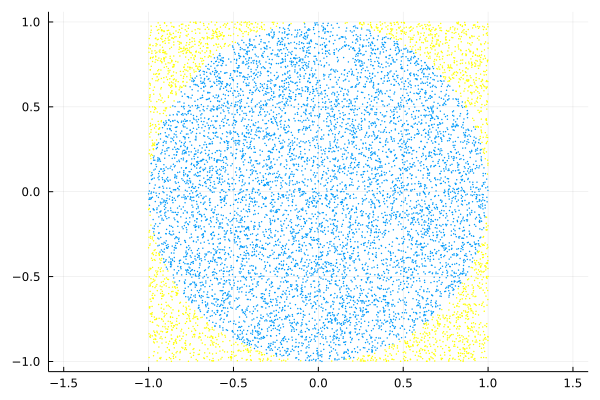

In [11]:
scatter(Tuple.(pairs[findall(x -> x <= 1, norms_list)]), ms=1, msw=0, aspect_ratio=:equal, legend = false)
scatter!(Tuple.(pairs[findall(x -> x > 1, norms_list)]), ms =1, msw=0, color =:yellow )

### Q9

In [6]:
num = parse(Int, readline())

73

In [8]:
function guess_machine(num::Integer)
    range = [0,100]
    for process in 1:3
        c = range[1] + (range[2]-range[1]) ÷ 2
        answer = readprompt("Is the number less than $c)? [yes/no]")
        if answer == "yes"
            range[2] = c
        elseif answer == "no"
            range[1] = c
        else 
            println("your input is neither of the defined words!")
        end
    end
    res = rand(range[1]:range[2])
    FinalAnswer = readprompt("Is $res your number? [yes/no]")
    if FinalAnswer == "yes"
        return "Successful"
    elseif FinalAnswer == "no"
        return "Failed"
    else 
        return "your input is neither of the defined words!"
    end
end
result = guess_machine(num)


"Failed"